In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.utils.extmath import randomized_svd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
from tqdm import tqdm
from umap import UMAP
warnings.filterwarnings('ignore')

C:\Users\Imad Eddine Hajjane\anaconda3\envs\tf_2\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\Imad Eddine Hajjane\anaconda3\envs\tf_2\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\Imad Eddine Hajjane\anaconda3\envs\tf_2\lib\site-packag

In [3]:
SILHOUETTE_SCORE = os.path.join("content","silhouette_score.npy")
TOPIC_CLUSTERING=os.path.join("content", "topic_clustering.png")

- **Importation**

In [21]:
dataframe = pd.read_csv(os.path.join("content", "clean_tweet.csv"), encoding="latin-1")

- **TF-IDF**

In [22]:
vectorizer = TfidfVectorizer(max_df = 0.5, use_idf = True)
vectors = vectorizer.fit_transform(dataframe["text"] )
terms = vectorizer.get_feature_names_out()

- **SVD (Single Vector Decomposition)**

In [23]:
%%time
U, Sigma, VT = randomized_svd(vectors, n_components=10, n_iter=100,random_state=122)

CPU times: total: 4.08 s
Wall time: 4.16 s


- **K-mean trouver le nombre de cluster ideal**

In [24]:
def cal_ideal_clusters_number(data, minK=2, maxK = 60, step=10):
    silhouette_score_k = []
    labels_ = []
    for k in tqdm(range(minK, maxK+1, step)):
        model = KMeans(n_clusters=k, n_init="auto", random_state=10)
        model.fit(data)
        silhouette_score_k.append(silhouette_score(data, model.labels_))
        print(f"for k {k} ==> {silhouette_score_k[-1]}")
    return silhouette_score_k

In [25]:
K_init = 3
K_final = 200
step = 1
X = U*Sigma
silhouette_score_k = cal_ideal_clusters_number(X, minK=K_init, maxK=K_final, step=step)

  1%|          | 1/198 [00:26<1:28:30, 26.96s/it]

for k 3 ==> 0.2597511800794699


  1%|          | 2/198 [00:54<1:28:51, 27.20s/it]

for k 4 ==> 0.256642860589484


  2%|▏         | 3/198 [01:21<1:28:25, 27.21s/it]

for k 5 ==> 0.2784578719364803


  2%|▏         | 4/198 [01:49<1:28:53, 27.49s/it]

for k 6 ==> 0.2713479394452869


  3%|▎         | 5/198 [02:16<1:28:08, 27.40s/it]

for k 7 ==> 0.280049750724447


  3%|▎         | 6/198 [02:43<1:27:16, 27.28s/it]

for k 8 ==> 0.25255015298852473


  4%|▎         | 7/198 [03:11<1:27:11, 27.39s/it]

for k 9 ==> 0.2569750306267913


  4%|▍         | 8/198 [03:38<1:26:28, 27.31s/it]

for k 10 ==> 0.28342943768935913


  5%|▍         | 9/198 [04:02<1:22:42, 26.25s/it]

for k 11 ==> 0.28598987246574953


  5%|▌         | 10/198 [04:24<1:17:54, 24.86s/it]

for k 12 ==> 0.2877790864291461


  6%|▌         | 11/198 [04:49<1:18:06, 25.06s/it]

for k 13 ==> 0.25205158189908866


  6%|▌         | 12/198 [05:15<1:18:05, 25.19s/it]

for k 14 ==> 0.2650582032640686


  7%|▋         | 13/198 [05:40<1:17:53, 25.26s/it]

for k 15 ==> 0.27092193288458233


  7%|▋         | 14/198 [06:06<1:17:44, 25.35s/it]

for k 16 ==> 0.2719404243603421


  8%|▊         | 15/198 [06:27<1:13:40, 24.15s/it]

for k 17 ==> 0.2205494547191245


  8%|▊         | 16/198 [06:47<1:09:23, 22.88s/it]

for k 18 ==> 0.2088551984137719


  9%|▊         | 17/198 [07:06<1:05:56, 21.86s/it]

for k 19 ==> 0.21403133845865668


  9%|▉         | 18/198 [07:26<1:03:32, 21.18s/it]

for k 20 ==> 0.21269412541252844


 10%|▉         | 19/198 [07:46<1:01:49, 20.72s/it]

for k 21 ==> 0.2860953192961591


 10%|█         | 20/198 [08:06<1:00:43, 20.47s/it]

for k 22 ==> 0.2795807037251804


 11%|█         | 21/198 [08:25<59:35, 20.20s/it]  

for k 23 ==> 0.2780862210635379


 11%|█         | 22/198 [08:45<58:49, 20.05s/it]

for k 24 ==> 0.2306405461753322


 12%|█▏        | 23/198 [09:04<57:54, 19.86s/it]

for k 25 ==> 0.23161136135648785


 12%|█▏        | 24/198 [09:24<57:19, 19.77s/it]

for k 26 ==> 0.22850928417932798


 13%|█▎        | 25/198 [09:43<56:42, 19.67s/it]

for k 27 ==> 0.22991917054461036


 13%|█▎        | 26/198 [10:03<56:13, 19.61s/it]

for k 28 ==> 0.23501735654018216


 14%|█▎        | 27/198 [10:22<55:43, 19.55s/it]

for k 29 ==> 0.2375830587914248


 14%|█▍        | 28/198 [10:42<55:13, 19.49s/it]

for k 30 ==> 0.23760694445843017


 15%|█▍        | 29/198 [11:01<54:54, 19.49s/it]

for k 31 ==> 0.23863188657056844


 15%|█▌        | 30/198 [11:21<54:35, 19.50s/it]

for k 32 ==> 0.23258688694396767


 16%|█▌        | 31/198 [11:40<54:16, 19.50s/it]

for k 33 ==> 0.23231160466905948


 16%|█▌        | 32/198 [12:00<54:09, 19.58s/it]

for k 34 ==> 0.23294587080286708


 17%|█▋        | 33/198 [12:20<54:01, 19.64s/it]

for k 35 ==> 0.23554287162683318


 17%|█▋        | 34/198 [12:39<53:41, 19.65s/it]

for k 36 ==> 0.23807084506795767


 18%|█▊        | 35/198 [13:00<54:16, 19.98s/it]

for k 37 ==> 0.23411881226055972


 18%|█▊        | 36/198 [13:21<54:42, 20.26s/it]

for k 38 ==> 0.2372318766992926


 19%|█▊        | 37/198 [13:42<54:38, 20.37s/it]

for k 39 ==> 0.23896888529363047


 19%|█▉        | 38/198 [14:02<54:08, 20.30s/it]

for k 40 ==> 0.23835602960174854


 20%|█▉        | 39/198 [14:22<53:31, 20.20s/it]

for k 41 ==> 0.2228866085861708


 20%|██        | 40/198 [14:42<52:57, 20.11s/it]

for k 42 ==> 0.222859061407102


 21%|██        | 41/198 [15:02<52:36, 20.11s/it]

for k 43 ==> 0.22484470870868684


 21%|██        | 42/198 [15:21<51:59, 19.99s/it]

for k 44 ==> 0.21043172123027717


 22%|██▏       | 43/198 [15:41<51:27, 19.92s/it]

for k 45 ==> 0.211746726710771


 22%|██▏       | 44/198 [16:01<51:20, 20.00s/it]

for k 46 ==> 0.21282336471670463


 23%|██▎       | 45/198 [16:21<50:45, 19.90s/it]

for k 47 ==> 0.21198095345247545


 23%|██▎       | 46/198 [16:41<50:09, 19.80s/it]

for k 48 ==> 0.213317865135134


 24%|██▎       | 47/198 [17:00<49:43, 19.76s/it]

for k 49 ==> 0.21505936082093707


 24%|██▍       | 48/198 [17:20<49:08, 19.65s/it]

for k 50 ==> 0.21391573897490815


 25%|██▍       | 49/198 [17:39<48:40, 19.60s/it]

for k 51 ==> 0.2141157169002488


 25%|██▌       | 50/198 [17:59<48:38, 19.72s/it]

for k 52 ==> 0.22198553592508727


 26%|██▌       | 51/198 [18:19<48:28, 19.79s/it]

for k 53 ==> 0.20788487584214882


 26%|██▋       | 52/198 [18:39<47:57, 19.71s/it]

for k 54 ==> 0.20864263985332995


 27%|██▋       | 53/198 [18:58<47:28, 19.64s/it]

for k 55 ==> 0.22357475233197538


 27%|██▋       | 54/198 [19:17<46:58, 19.58s/it]

for k 56 ==> 0.2247173853345405


 28%|██▊       | 55/198 [19:37<46:31, 19.52s/it]

for k 57 ==> 0.22641044571734922


 28%|██▊       | 56/198 [19:56<46:11, 19.52s/it]

for k 58 ==> 0.22690850915409427


 29%|██▉       | 57/198 [20:16<45:46, 19.48s/it]

for k 59 ==> 0.22690063463276042


 29%|██▉       | 58/198 [20:35<45:17, 19.41s/it]

for k 60 ==> 0.2265551910146964


 30%|██▉       | 59/198 [20:54<44:49, 19.35s/it]

for k 61 ==> 0.2316517155383116


 30%|███       | 60/198 [21:13<44:26, 19.33s/it]

for k 62 ==> 0.23196063970643657


 31%|███       | 61/198 [21:33<44:06, 19.32s/it]

for k 63 ==> 0.23229061004649176


 31%|███▏      | 62/198 [21:52<43:47, 19.32s/it]

for k 64 ==> 0.23301164355756385


 32%|███▏      | 63/198 [22:11<43:28, 19.32s/it]

for k 65 ==> 0.2342495676497274


 32%|███▏      | 64/198 [22:31<43:05, 19.29s/it]

for k 66 ==> 0.2351499317286343


 33%|███▎      | 65/198 [22:50<42:47, 19.31s/it]

for k 67 ==> 0.2342854661438761


 33%|███▎      | 66/198 [23:09<42:27, 19.30s/it]

for k 68 ==> 0.22513585598151656


 34%|███▍      | 67/198 [23:28<42:02, 19.26s/it]

for k 69 ==> 0.22504742314436704


 34%|███▍      | 68/198 [23:47<41:32, 19.17s/it]

for k 70 ==> 0.22542272811541436


 35%|███▍      | 69/198 [24:06<41:03, 19.10s/it]

for k 71 ==> 0.22596765743298605


 35%|███▌      | 70/198 [24:25<40:35, 19.03s/it]

for k 72 ==> 0.2211664508544162


 36%|███▌      | 71/198 [24:44<40:17, 19.03s/it]

for k 73 ==> 0.2253796809236399


 36%|███▋      | 72/198 [25:03<39:54, 19.00s/it]

for k 74 ==> 0.22495091637025882


 37%|███▋      | 73/198 [25:22<39:26, 18.94s/it]

for k 75 ==> 0.22315802124913364


 37%|███▋      | 74/198 [25:41<39:02, 18.89s/it]

for k 76 ==> 0.22410152105751727


 38%|███▊      | 75/198 [26:00<38:40, 18.87s/it]

for k 77 ==> 0.22213132846615155


 38%|███▊      | 76/198 [26:18<38:23, 18.88s/it]

for k 78 ==> 0.22222632691885982


 39%|███▉      | 77/198 [26:37<38:05, 18.89s/it]

for k 79 ==> 0.22284324031465652


 39%|███▉      | 78/198 [26:56<37:45, 18.88s/it]

for k 80 ==> 0.22436301160000566


 40%|███▉      | 79/198 [27:15<37:24, 18.86s/it]

for k 81 ==> 0.22056669431503556


 40%|████      | 80/198 [27:34<37:03, 18.84s/it]

for k 82 ==> 0.2184399813493349


 41%|████      | 81/198 [27:53<36:45, 18.85s/it]

for k 83 ==> 0.21901619220828117


 41%|████▏     | 82/198 [28:12<36:27, 18.85s/it]

for k 84 ==> 0.2175166108156498


 42%|████▏     | 83/198 [28:30<36:05, 18.83s/it]

for k 85 ==> 0.21741630840054502


 42%|████▏     | 84/198 [28:49<35:45, 18.82s/it]

for k 86 ==> 0.20958620828542426


 43%|████▎     | 85/198 [29:08<35:29, 18.85s/it]

for k 87 ==> 0.210139998880406


 43%|████▎     | 86/198 [29:27<35:12, 18.86s/it]

for k 88 ==> 0.21071349911784534


 44%|████▍     | 87/198 [29:46<34:54, 18.87s/it]

for k 89 ==> 0.21135510886489522


 44%|████▍     | 88/198 [30:05<34:36, 18.88s/it]

for k 90 ==> 0.21010152790516548


 45%|████▍     | 89/198 [30:24<34:19, 18.89s/it]

for k 91 ==> 0.20658485291496398


 45%|████▌     | 90/198 [30:43<34:11, 18.99s/it]

for k 92 ==> 0.20561343700903567


 46%|████▌     | 91/198 [31:02<33:47, 18.94s/it]

for k 93 ==> 0.2054851747440801


 46%|████▋     | 92/198 [31:21<33:23, 18.90s/it]

for k 94 ==> 0.20481925131349454


 47%|████▋     | 93/198 [31:39<32:59, 18.86s/it]

for k 95 ==> 0.20460229068792155


 47%|████▋     | 94/198 [31:58<32:40, 18.85s/it]

for k 96 ==> 0.20380766178294832


 48%|████▊     | 95/198 [32:17<32:18, 18.82s/it]

for k 97 ==> 0.20415360995027318


 48%|████▊     | 96/198 [32:36<31:58, 18.81s/it]

for k 98 ==> 0.20444150671971806


 49%|████▉     | 97/198 [32:54<31:38, 18.80s/it]

for k 99 ==> 0.20562366182918712


 49%|████▉     | 98/198 [33:13<31:20, 18.80s/it]

for k 100 ==> 0.20582731536091556


 50%|█████     | 99/198 [33:32<31:03, 18.83s/it]

for k 101 ==> 0.20603069126067536


 51%|█████     | 100/198 [33:51<30:41, 18.79s/it]

for k 102 ==> 0.2021082342128969


 51%|█████     | 101/198 [34:10<30:23, 18.80s/it]

for k 103 ==> 0.20223503713517677


 52%|█████▏    | 102/198 [34:28<30:02, 18.78s/it]

for k 104 ==> 0.20211954597842452


 52%|█████▏    | 103/198 [34:47<29:42, 18.77s/it]

for k 105 ==> 0.20441052068829949


 53%|█████▎    | 104/198 [35:06<29:31, 18.85s/it]

for k 106 ==> 0.20209716120107915


 53%|█████▎    | 105/198 [35:25<29:12, 18.84s/it]

for k 107 ==> 0.20172565783454194


 54%|█████▎    | 106/198 [35:44<28:56, 18.88s/it]

for k 108 ==> 0.20249667687114076


 54%|█████▍    | 107/198 [36:03<28:33, 18.83s/it]

for k 109 ==> 0.2051186209632542


 55%|█████▍    | 108/198 [36:21<28:13, 18.82s/it]

for k 110 ==> 0.20570703823057854


 55%|█████▌    | 109/198 [36:40<28:00, 18.89s/it]

for k 111 ==> 0.2053167227309635


 56%|█████▌    | 110/198 [37:00<27:47, 18.95s/it]

for k 112 ==> 0.20547090987930888


 56%|█████▌    | 111/198 [37:18<27:21, 18.87s/it]

for k 113 ==> 0.20702372860636706


 57%|█████▋    | 112/198 [37:37<27:05, 18.90s/it]

for k 114 ==> 0.20631776878862546


 57%|█████▋    | 113/198 [37:56<26:41, 18.84s/it]

for k 115 ==> 0.20640474906167267


 58%|█████▊    | 114/198 [38:15<26:18, 18.79s/it]

for k 116 ==> 0.20840673561878562


 58%|█████▊    | 115/198 [38:34<26:02, 18.83s/it]

for k 117 ==> 0.20691222715116409


 59%|█████▊    | 116/198 [38:53<25:48, 18.88s/it]

for k 118 ==> 0.20700499457219304


 59%|█████▉    | 117/198 [39:11<25:29, 18.89s/it]

for k 119 ==> 0.20741017254577568


 60%|█████▉    | 118/198 [39:30<25:04, 18.80s/it]

for k 120 ==> 0.20777090188938238


 60%|██████    | 119/198 [39:49<24:48, 18.85s/it]

for k 121 ==> 0.2072664628834948


 61%|██████    | 120/198 [40:08<24:26, 18.80s/it]

for k 122 ==> 0.20815561737773067


 61%|██████    | 121/198 [40:27<24:11, 18.85s/it]

for k 123 ==> 0.20481657558688787


 62%|██████▏   | 122/198 [40:45<23:52, 18.85s/it]

for k 124 ==> 0.20685710714818853


 62%|██████▏   | 123/198 [41:04<23:31, 18.81s/it]

for k 125 ==> 0.20749253684165644


 63%|██████▎   | 124/198 [41:23<23:09, 18.78s/it]

for k 126 ==> 0.20812679696330555


 63%|██████▎   | 125/198 [41:41<22:46, 18.71s/it]

for k 127 ==> 0.2080145496767885


 64%|██████▎   | 126/198 [42:00<22:26, 18.70s/it]

for k 128 ==> 0.206873428541722


 64%|██████▍   | 127/198 [42:19<22:06, 18.68s/it]

for k 129 ==> 0.20905043410012902


 65%|██████▍   | 128/198 [42:37<21:46, 18.67s/it]

for k 130 ==> 0.20665228818884998


 65%|██████▌   | 129/198 [42:56<21:36, 18.79s/it]

for k 131 ==> 0.2066238557259258


 66%|██████▌   | 130/198 [43:15<21:15, 18.75s/it]

for k 132 ==> 0.21045294478765783


 66%|██████▌   | 131/198 [43:34<20:54, 18.72s/it]

for k 133 ==> 0.2105041265517664


 67%|██████▋   | 132/198 [43:52<20:34, 18.70s/it]

for k 134 ==> 0.2096585182590846


 67%|██████▋   | 133/198 [44:11<20:14, 18.69s/it]

for k 135 ==> 0.2077054843520553


 68%|██████▊   | 134/198 [44:30<19:55, 18.68s/it]

for k 136 ==> 0.2010472774195346


 68%|██████▊   | 135/198 [44:48<19:34, 18.64s/it]

for k 137 ==> 0.2017522573837937


 69%|██████▊   | 136/198 [45:07<19:15, 18.63s/it]

for k 138 ==> 0.2016533869775949


 69%|██████▉   | 137/198 [45:26<18:56, 18.63s/it]

for k 139 ==> 0.1991110473890091


 70%|██████▉   | 138/198 [45:44<18:39, 18.66s/it]

for k 140 ==> 0.1996294586247323


 70%|███████   | 139/198 [46:03<18:22, 18.68s/it]

for k 141 ==> 0.20040526944313697


 71%|███████   | 140/198 [46:22<18:03, 18.68s/it]

for k 142 ==> 0.19642165733735287


 71%|███████   | 141/198 [46:40<17:46, 18.71s/it]

for k 143 ==> 0.1960187056845502


 72%|███████▏  | 142/198 [46:59<17:28, 18.72s/it]

for k 144 ==> 0.19483495744431653


 72%|███████▏  | 143/198 [47:18<17:18, 18.87s/it]

for k 145 ==> 0.19594514200913554


 73%|███████▎  | 144/198 [47:37<16:56, 18.82s/it]

for k 146 ==> 0.19536152917120408


 73%|███████▎  | 145/198 [47:56<16:38, 18.83s/it]

for k 147 ==> 0.1967457499810104


 74%|███████▎  | 146/198 [48:15<16:25, 18.96s/it]

for k 148 ==> 0.19844153306376383


 74%|███████▍  | 147/198 [48:34<16:02, 18.87s/it]

for k 149 ==> 0.1935214278731739


 75%|███████▍  | 148/198 [48:53<15:41, 18.82s/it]

for k 150 ==> 0.19236225716166824


 75%|███████▌  | 149/198 [49:11<15:21, 18.80s/it]

for k 151 ==> 0.19242794687277018


 76%|███████▌  | 150/198 [49:30<15:01, 18.78s/it]

for k 152 ==> 0.19947272390003568


 76%|███████▋  | 151/198 [49:49<14:44, 18.82s/it]

for k 153 ==> 0.19948614214623334


 77%|███████▋  | 152/198 [50:08<14:27, 18.85s/it]

for k 154 ==> 0.198861533550863


 77%|███████▋  | 153/198 [50:27<14:07, 18.83s/it]

for k 155 ==> 0.1991528307051218


 78%|███████▊  | 154/198 [50:45<13:47, 18.81s/it]

for k 156 ==> 0.19350927972100318


 78%|███████▊  | 155/198 [51:04<13:28, 18.80s/it]

for k 157 ==> 0.19346384928337668


 79%|███████▉  | 156/198 [51:23<13:09, 18.81s/it]

for k 158 ==> 0.19350480599908643


 79%|███████▉  | 157/198 [51:42<12:52, 18.85s/it]

for k 159 ==> 0.19386592542743358


 80%|███████▉  | 158/198 [52:01<12:34, 18.86s/it]

for k 160 ==> 0.19375170993173776


 80%|████████  | 159/198 [52:20<12:14, 18.84s/it]

for k 161 ==> 0.19436432130140457


 81%|████████  | 160/198 [52:39<11:55, 18.83s/it]

for k 162 ==> 0.19355861596578994


 81%|████████▏ | 161/198 [52:57<11:36, 18.82s/it]

for k 163 ==> 0.19348139690385527


 82%|████████▏ | 162/198 [53:16<11:17, 18.82s/it]

for k 164 ==> 0.19348493897801436


 82%|████████▏ | 163/198 [53:35<10:58, 18.82s/it]

for k 165 ==> 0.19395287255137902


 83%|████████▎ | 164/198 [53:54<10:39, 18.80s/it]

for k 166 ==> 0.19243667321543828


 83%|████████▎ | 165/198 [54:13<10:20, 18.81s/it]

for k 167 ==> 0.1930357939164639


 84%|████████▍ | 166/198 [54:31<10:01, 18.81s/it]

for k 168 ==> 0.19298444127064507


 84%|████████▍ | 167/198 [54:50<09:43, 18.82s/it]

for k 169 ==> 0.1930174889358635


 85%|████████▍ | 168/198 [55:09<09:25, 18.85s/it]

for k 170 ==> 0.19329936619530735


 85%|████████▌ | 169/198 [55:28<09:07, 18.87s/it]

for k 171 ==> 0.1894018473756749


 86%|████████▌ | 170/198 [55:47<08:48, 18.86s/it]

for k 172 ==> 0.18971142907419444


 86%|████████▋ | 171/198 [56:06<08:30, 18.91s/it]

for k 173 ==> 0.18931811523456582


 87%|████████▋ | 172/198 [56:25<08:11, 18.91s/it]

for k 174 ==> 0.18945320463758394


 87%|████████▋ | 173/198 [56:44<07:52, 18.90s/it]

for k 175 ==> 0.18917300009108473


 88%|████████▊ | 174/198 [57:02<07:32, 18.85s/it]

for k 176 ==> 0.1899771178504107


 88%|████████▊ | 175/198 [57:22<07:15, 18.95s/it]

for k 177 ==> 0.18966573576493442


 89%|████████▉ | 176/198 [57:41<06:58, 19.03s/it]

for k 178 ==> 0.1896236695257805


 89%|████████▉ | 177/198 [58:00<06:42, 19.15s/it]

for k 179 ==> 0.18873996361174353


 90%|████████▉ | 178/198 [58:19<06:23, 19.15s/it]

for k 180 ==> 0.18941177995415723


 90%|█████████ | 179/198 [58:39<06:04, 19.18s/it]

for k 181 ==> 0.18891327619908743


 91%|█████████ | 180/198 [58:58<05:45, 19.19s/it]

for k 182 ==> 0.18763528275920996


 91%|█████████▏| 181/198 [59:17<05:26, 19.22s/it]

for k 183 ==> 0.18819295461505012


 92%|█████████▏| 182/198 [59:37<05:08, 19.30s/it]

for k 184 ==> 0.18049227606332188


 92%|█████████▏| 183/198 [59:56<04:49, 19.33s/it]

for k 185 ==> 0.1806902318119356


 93%|█████████▎| 184/198 [1:00:15<04:28, 19.20s/it]

for k 186 ==> 0.18114933467267633


 93%|█████████▎| 185/198 [1:00:34<04:08, 19.13s/it]

for k 187 ==> 0.18158803626565165


 94%|█████████▍| 186/198 [1:00:53<03:48, 19.05s/it]

for k 188 ==> 0.1817970987251194


 94%|█████████▍| 187/198 [1:01:11<03:28, 18.96s/it]

for k 189 ==> 0.18211173501674963


 95%|█████████▍| 188/198 [1:01:30<03:09, 18.96s/it]

for k 190 ==> 0.1823129100307513


 95%|█████████▌| 189/198 [1:01:49<02:50, 18.97s/it]

for k 191 ==> 0.18304094870277068


 96%|█████████▌| 190/198 [1:02:08<02:31, 18.96s/it]

for k 192 ==> 0.18417978094149598


 96%|█████████▋| 191/198 [1:02:27<02:12, 18.97s/it]

for k 193 ==> 0.1842692836616432


 97%|█████████▋| 192/198 [1:02:46<01:53, 18.94s/it]

for k 194 ==> 0.18340271176099224


 97%|█████████▋| 193/198 [1:03:05<01:34, 18.93s/it]

for k 195 ==> 0.18358821636764783


 98%|█████████▊| 194/198 [1:03:24<01:15, 18.88s/it]

for k 196 ==> 0.18302539337735346


 98%|█████████▊| 195/198 [1:03:43<00:56, 18.89s/it]

for k 197 ==> 0.1837665676211878


 99%|█████████▉| 196/198 [1:04:02<00:37, 18.89s/it]

for k 198 ==> 0.1834204233674241


 99%|█████████▉| 197/198 [1:04:21<00:18, 18.93s/it]

for k 199 ==> 0.18364128288656797


100%|██████████| 198/198 [1:04:40<00:00, 19.60s/it]

for k 200 ==> 0.18282785742657376


In [26]:
silhouette_score_k = np.hstack((np.array([0, 0]), silhouette_score_k))
np.save(SILHOUETTE_SCORE, np.asarray(silhouette_score_k), allow_pickle=False)

In [14]:
silhouette_score_k = np.load(SILHOUETTE_SCORE)

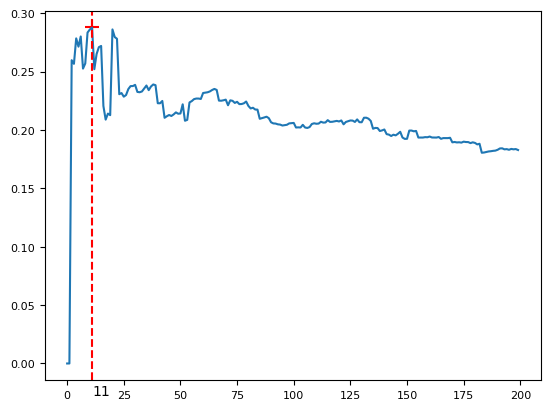

In [33]:
pd.DataFrame({'cluster number': list(range(silhouette_score_k.shape[0])), 'silhouette score':silhouette_score_k})['silhouette score'].plot( fontsize=8)
plt.scatter(silhouette_score_k.argmax(), silhouette_score_k.max(), marker="+", color="r", s=100)
plt.axvline(x=silhouette_score_k.argmax(), color='red', linestyle='--')
plt.text(silhouette_score_k.argmax(), -0.03, f'{silhouette_score_k.argmax()}', rotation=0, verticalalignment='bottom')
plt.savefig(os.path.join("content", "silhouette_score_k.png"))

In [37]:
print(f"pour l'interval [{K_init},{K_final}] le numbre de cluster optimal est {silhouette_score_k.argmax()} avec un score de :{silhouette_score_k.max()}")

pour l'interval [3,200] le numbre de cluster optimal est 11 avec un score de :0.2877790864291461


In [38]:
n_clusters = silhouette_score_k.argmax()
model = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
model.fit(X)
cluster_labels = model.labels_

In [39]:
sample_silhouette_values = silhouette_samples(X, cluster_labels)

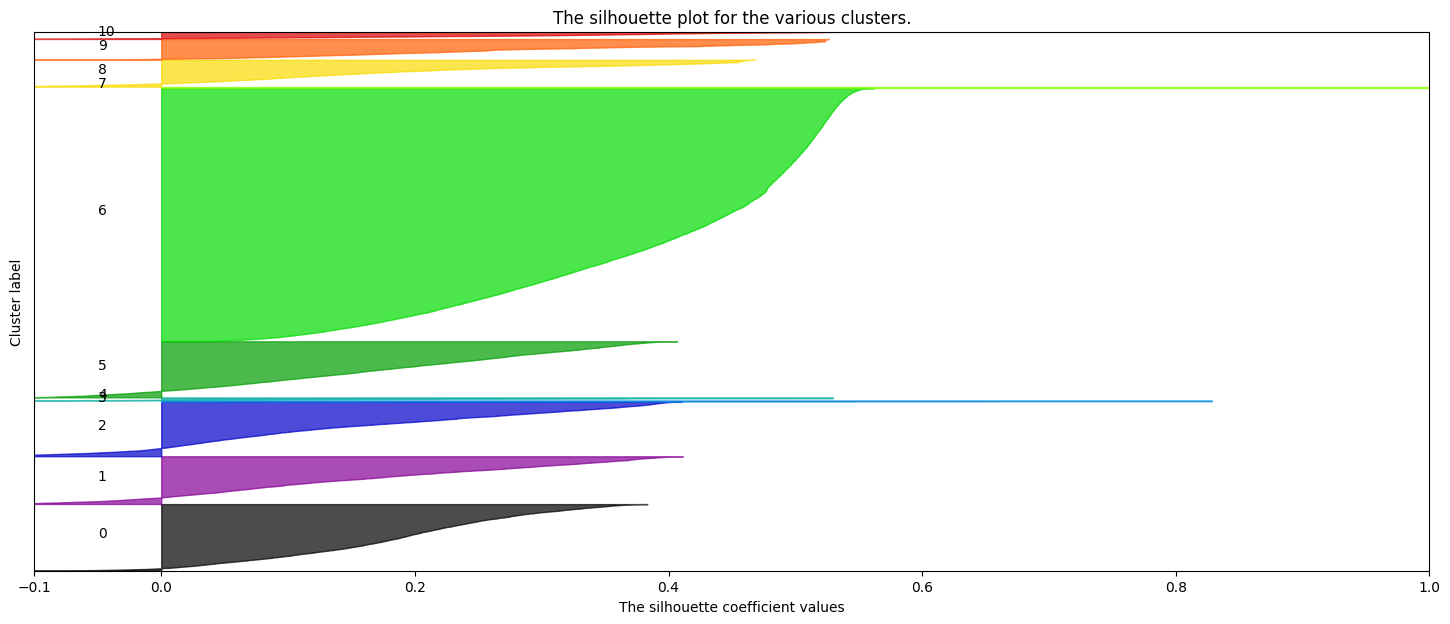

In [40]:
y_lower = 10
fig, ax1 = plt.subplots()
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10 
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.set_yticks([]) 
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

In [41]:
SAMPLE_SILHOUETTE=os.path.join("content", f"sample_silhouette_values_{n_clusters}.png")

In [42]:
fig.savefig(SAMPLE_SILHOUETTE)

- **K-mean**

In [43]:
%%time
model = KMeans(n_clusters=n_clusters, init="k-means++")
model.fit(X)

CPU times: total: 3.44 s
Wall time: 338 ms


KMeans(n_clusters=11)

In [44]:
embedding = UMAP(n_components=3, n_neighbors=100, min_dist=0.5, random_state=12, n_jobs=-1).fit_transform(X)

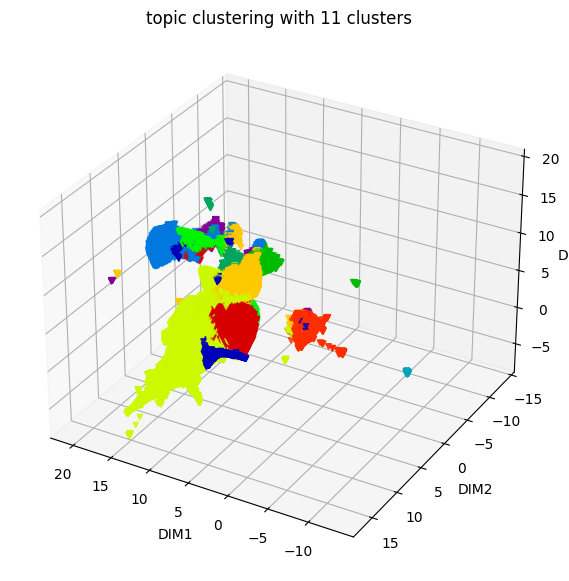

In [45]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], marker='v', s=15,  c=[cm.nipy_spectral(float(d+1) / (n_clusters+1)) for d in model.labels_])
ax.set_xlabel('DIM1')
ax.set_ylabel('DIM2')
ax.set_zlabel('DIM3')
ax.set_title(f"topic clustering with {n_clusters} clusters")
ax.view_init(30, 120)
fig.savefig(TOPIC_CLUSTERING)